<a href="https://colab.research.google.com/github/asutoshsabat91/Credit_Score_Classification/blob/main/Credit_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Score

Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Loading Data

In [2]:
df= pd.read_csv('/content/credit_score.csv')
df=df.drop(columns=["ID", "Customer_ID","Name","SSN","Type_of_Loan","Credit_History_Age"])
df.head()

<ipython-input-2-3856721085>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/content/credit_score.csv')


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [4]:
df.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0


Data Cleaning

In [5]:
import numpy as np
df["Age"] = df["Age"].astype(str).str.replace("_","")
df["Age"] = df["Age"].astype(int)
df["Occupation"] = df["Occupation"].replace("_______",np.nan)
df["Annual_Income"] = df["Annual_Income"].astype(str).str.replace("_","")
df["Annual_Income"] = df["Annual_Income"].astype(float)
df["Num_of_Loan"] = df["Num_of_Loan"].astype(str).str.replace("_","")
df["Num_of_Loan"] = df["Num_of_Loan"].astype(int)
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].astype(str).str.replace("_","")
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].astype(float)
df["Credit_Score"] = df["Credit_Score"].replace(["Poor","Standard","Good"],[0,1,2])
df["Monthly_Balance"] = df["Monthly_Balance"].astype(str).str.replace("_","")
df["Monthly_Balance"] = df["Monthly_Balance"].astype(float)
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("!@9#%8",np.nan)
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].astype(str).str.replace("_","")
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].astype(float)
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace("NM","No")
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace("Yes","No")
df["Outstanding_Debt"] = df["Outstanding_Debt"].astype(str).str.replace("_","")
df["Outstanding_Debt"] = df["Outstanding_Debt"].astype(float)
df["Credit_Mix"] = df["Credit_Mix"].replace("_",np.nan)
df["Credit_Mix"] = df["Credit_Mix"].replace(["Standard","Good","Bad"],[1,2,0])
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].replace("_",np.nan).replace('',np.nan)
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].astype(float)

<ipython-input-5-1723426338>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Credit_Score"] = df["Credit_Score"].replace(["Poor","Standard","Good"],[0,1,2])
<ipython-input-5-1723426338>:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Credit_Mix"] = df["Credit_Mix"].replace(["Standard","Good","Bad"],[1,2,0])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   fl

In [7]:
df.isnull().sum()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())
df.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0


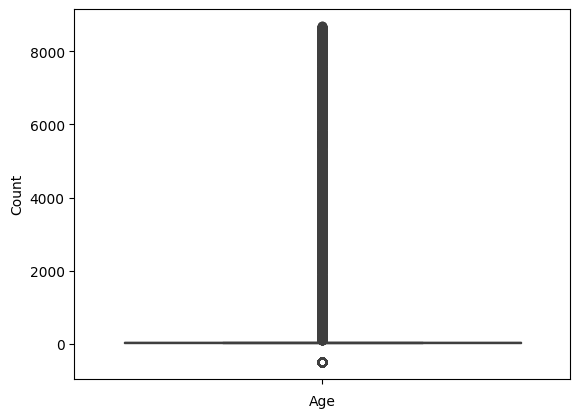

In [8]:
sns.boxplot(df["Age"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

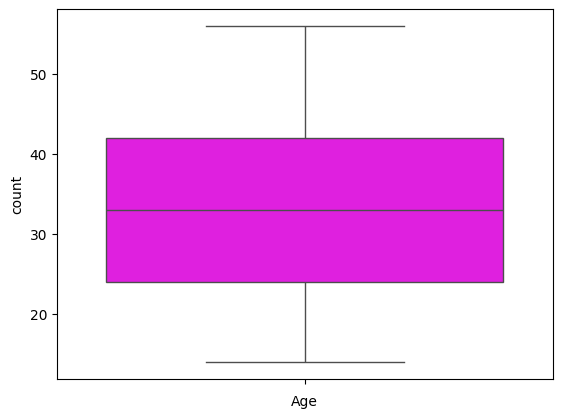

In [9]:
col_names=["Age"]
Q1=df.Age.quantile(0.25)
Q3=df.Age.quantile(0.75)
IQR= Q3-Q1
data= df[(df.Age >= Q1 - 1.5*IQR)& (df.Age <= Q3 + 1.5*IQR)]
sns.boxplot(data["Age"], color='magenta')
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

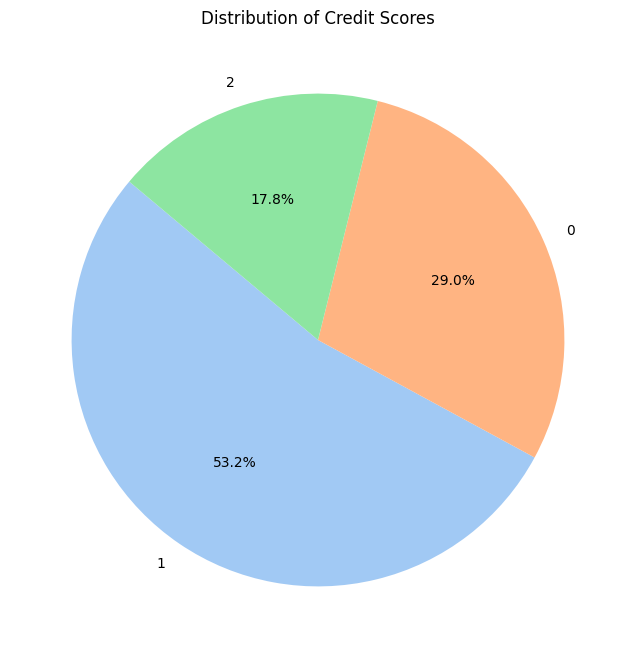

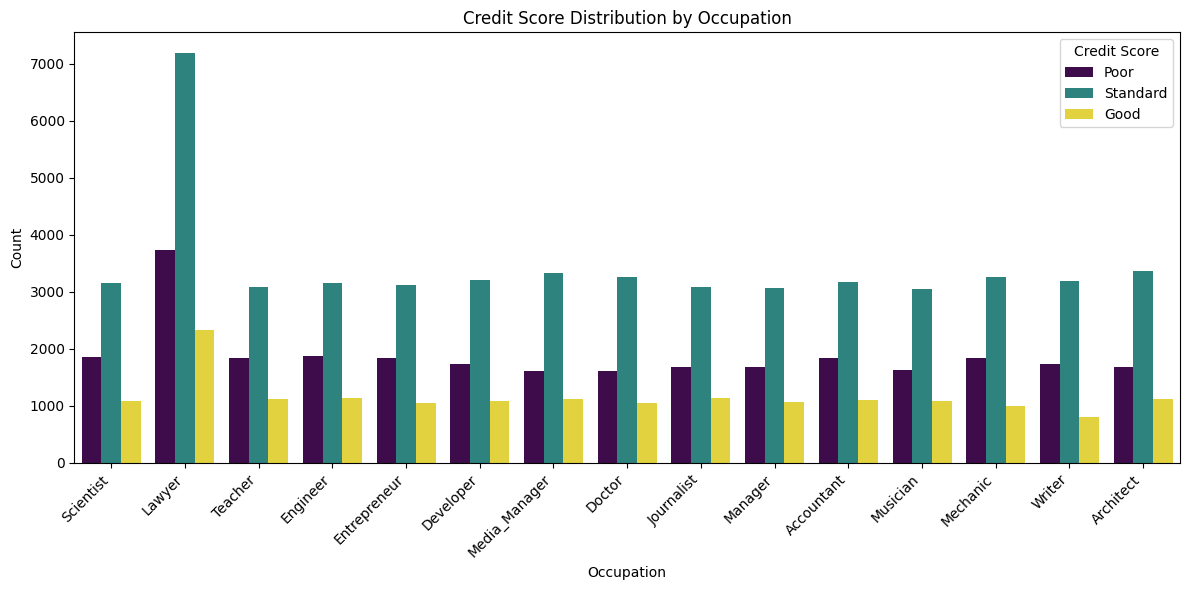

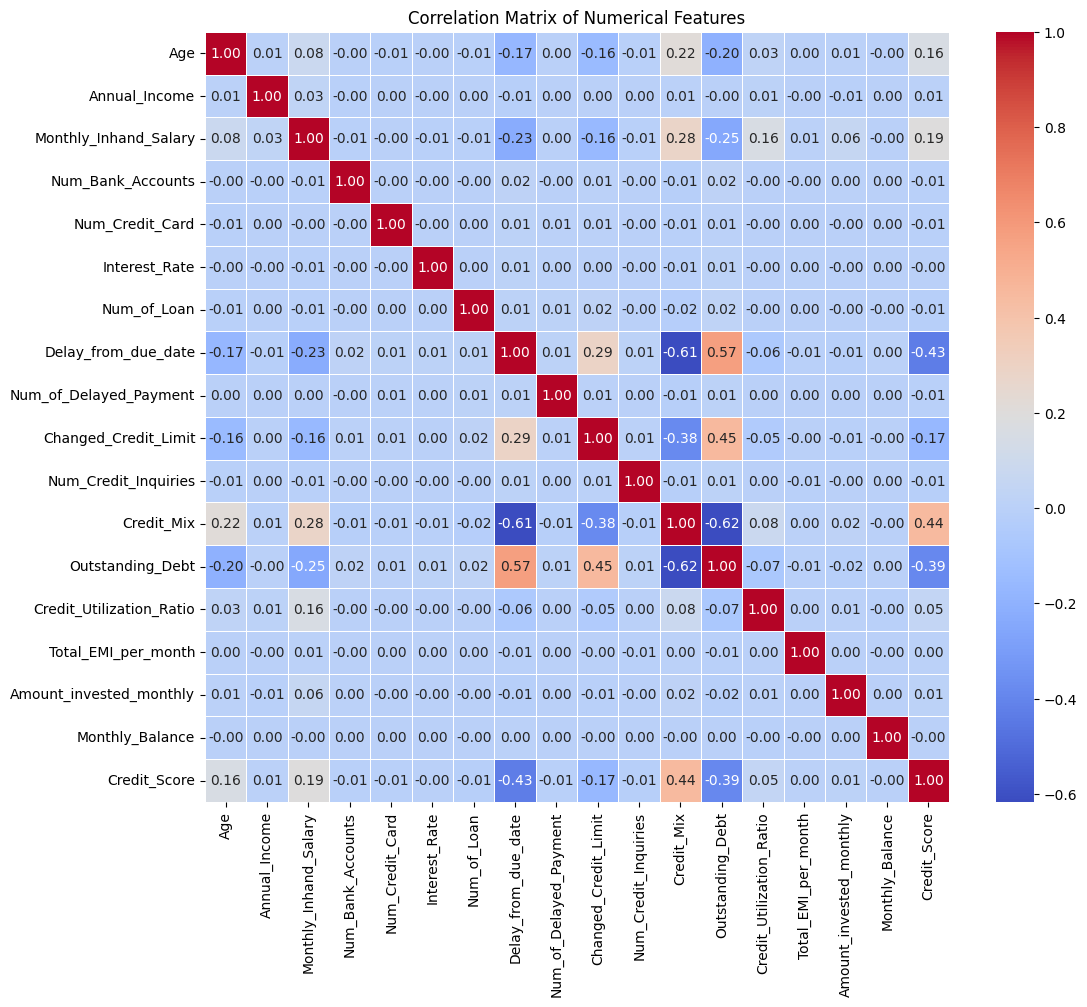

<ipython-input-12-829170086>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Credit_Mix', palette='rocket')


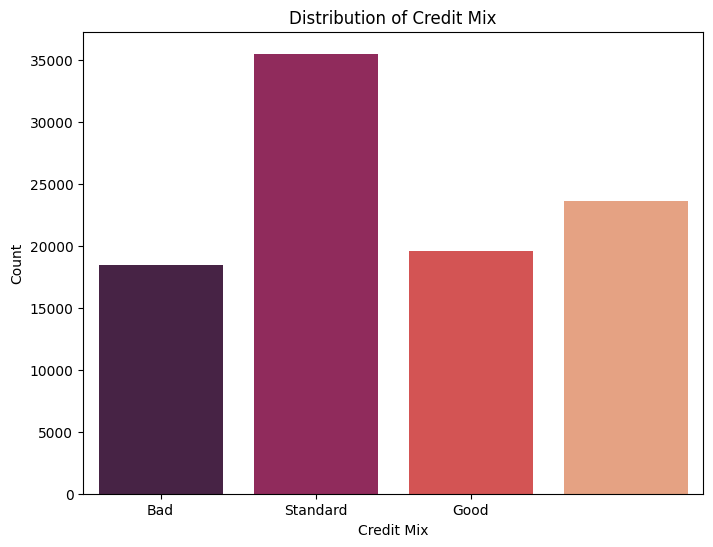

<ipython-input-12-829170086>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Credit_Score', y='Age', palette='mako')


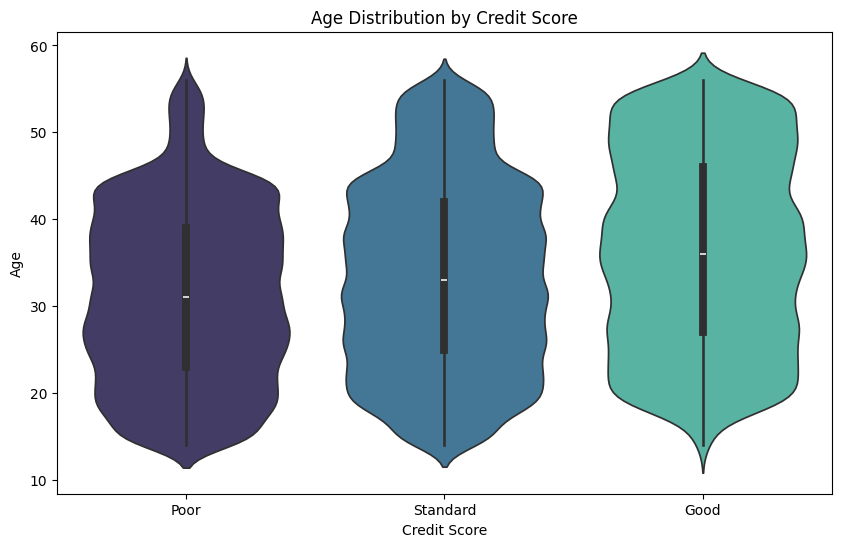

<ipython-input-12-829170086>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Payment_of_Min_Amount', palette='flare')


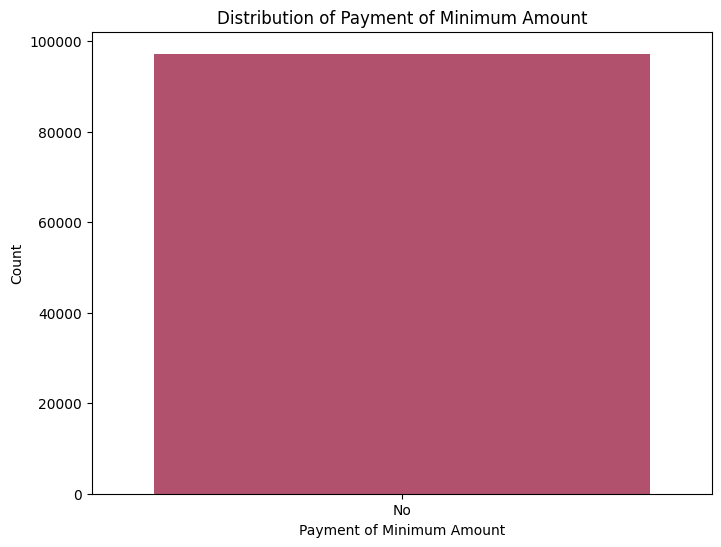

<ipython-input-12-829170086>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Occupation', y='Outstanding_Debt', palette='viridis')


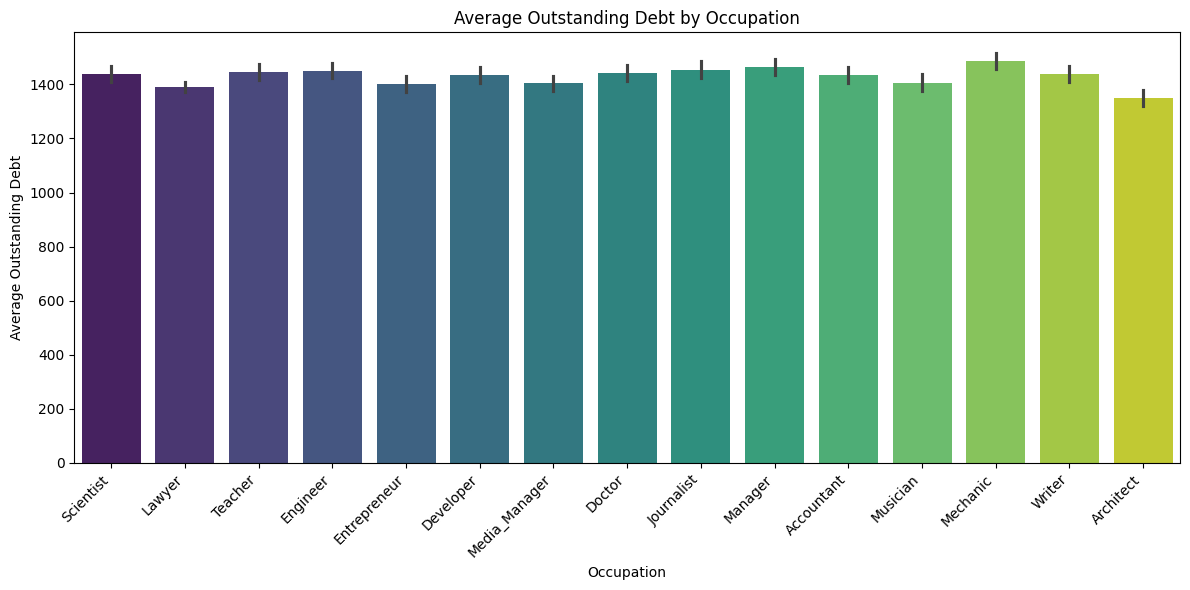

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pie chart of Credit Scores
plt.figure(figsize=(8, 8))
credit_score_counts = data['Credit_Score'].value_counts()
plt.pie(credit_score_counts, labels=credit_score_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Credit Scores')
plt.show()

# Bar plot of Occupation vs. Credit Score
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Occupation', hue='Credit_Score', palette='viridis')
plt.title('Credit Score Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
plt.tight_layout()
plt.show()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Count plot of Credit Mix
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Credit_Mix', palette='rocket')
plt.title('Distribution of Credit Mix')
plt.xlabel('Credit Mix')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Bad', 'Standard', 'Good'])
plt.show()


# Violin plot of Age by Credit Score
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Credit_Score', y='Age', palette='mako')
plt.title('Age Distribution by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.xticks([0, 1, 2], ['Poor', 'Standard', 'Good'])
plt.show()



# Count plot of Payment of Minimum Amount
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Payment_of_Min_Amount', palette='flare')
plt.title('Distribution of Payment of Minimum Amount')
plt.xlabel('Payment of Minimum Amount')
plt.ylabel('Count')
plt.show()

# Bar plot of Average Outstanding Debt by Occupation
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Occupation', y='Outstanding_Debt', palette='viridis')
plt.title('Average Outstanding Debt by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Outstanding Debt')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

One Hot Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Occupation"]= le.fit_transform(df["Occupation"])
df["Month"]=le.fit_transform(df["Month"])
df["Payment_Behaviour"]=le.fit_transform(df["Payment_Behaviour"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  fl

Feature Selection

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
   if((df[col].dtype != 'object') & (col !='Credit_Score')) :
    col_list.append(col)

X=df[col_list]
vif_data= pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"]  = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                     feature       VIF
0                      Month  0.300012
1                        Age  0.974661
2                 Occupation  0.263078
3              Annual_Income  0.985001
4      Monthly_Inhand_Salary  0.328768
5          Num_Bank_Accounts  0.979247
6            Num_Credit_Card  0.970567
7              Interest_Rate  0.976430
8                Num_of_Loan  0.997697
9        Delay_from_due_date  0.332213
10    Num_of_Delayed_Payment  0.980271
11      Changed_Credit_Limit  0.294887
12      Num_Credit_Inquiries  0.979379
13                Credit_Mix  0.274019
14          Outstanding_Debt  0.396141
15  Credit_Utilization_Ratio  0.024506
16       Total_EMI_per_month  0.972258
17   Amount_invested_monthly  0.907544
18         Payment_Behaviour  0.290781
19           Monthly_Balance  1.000196


Logistic Regression

In [20]:
# Handle categorical columns before splitting and scaling
df['Credit_Mix'] = df['Credit_Mix'].replace('np.nan', np.nan) # Replace the string 'np.nan' with actual np.nan
df['Credit_Mix'] = df['Credit_Mix'].fillna(df['Credit_Mix'].mode()[0]) # Fill missing values
df['Credit_Mix'] = le.fit_transform(df['Credit_Mix']) # Label encode


X=df.drop(columns=["Credit_Score"])
y=df["Credit_Score"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
pd.DataFrame({"Actual":y_test, "Predicted":y_pred})

0.61165
[[2391 3012  471]
 [1331 7840 1428]
 [  51 1474 2002]]
              precision    recall  f1-score   support

           0       0.63      0.41      0.50      5874
           1       0.64      0.74      0.68     10599
           2       0.51      0.57      0.54      3527

    accuracy                           0.61     20000
   macro avg       0.59      0.57      0.57     20000
weighted avg       0.61      0.61      0.60     20000



,Actual,Predicted
75721,2,2
80184,0,0
19864,2,2
76699,0,1
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1


Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred= dt.predict(x_test)
print(accuracy_score(y_test, y_pred))
pd.DataFrame({"Actual":y_test, "Predicted":y_pred})

0.67635


,Actual,Predicted
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,1
...,...,...
32595,1,0
29313,1,1
37862,0,1
53421,1,1


Hyper Parameter Tuning on Decision Tree

In [22]:
from sklearn.model_selection import GridSearchCV
parameters ={'max_features':['log2','sqrt','auto'],
             'criterion':['entropy','gini'],
             'max_depth':[2,3,5,10,50],
             'min_samples_split':[2,3,50,100],
             'min_samples_leaf':[1,5,8,10]
          }
grid_obj = GridSearchCV(dt, parameters)
grid_obj = grid_obj.fit(x_train, y_train)
dt= grid_obj.best_estimator_
y_pred = dt.predict(x_test)
acc_dt = round(accuracy_score(y_test, y_pred)*100,2)
print(acc_dt)

70.01


Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)
print(accuracy_score(y_test, y_pred))
pd.DataFrame({'Actual_Value':y_test, 'Predicted_Value':y_pred})

0.7831


,Actual_Value,Predicted_Value
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1


**Accuracy**

Logistic Regression Metrics:


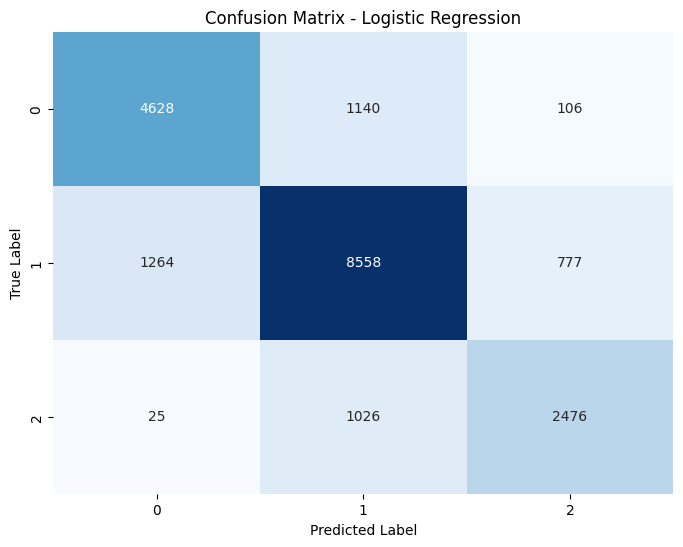


Decision Tree Metrics (Before Tuning):


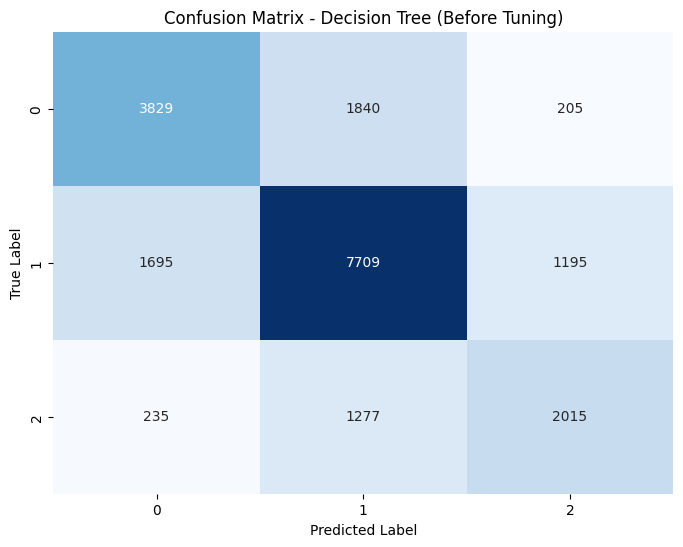

Accuracy: 0.67765
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.65      0.66      5874
           1       0.71      0.73      0.72     10599
           2       0.59      0.57      0.58      3527

    accuracy                           0.68     20000
   macro avg       0.66      0.65      0.65     20000
weighted avg       0.68      0.68      0.68     20000


Decision Tree Metrics (After Hyperparameter Tuning):


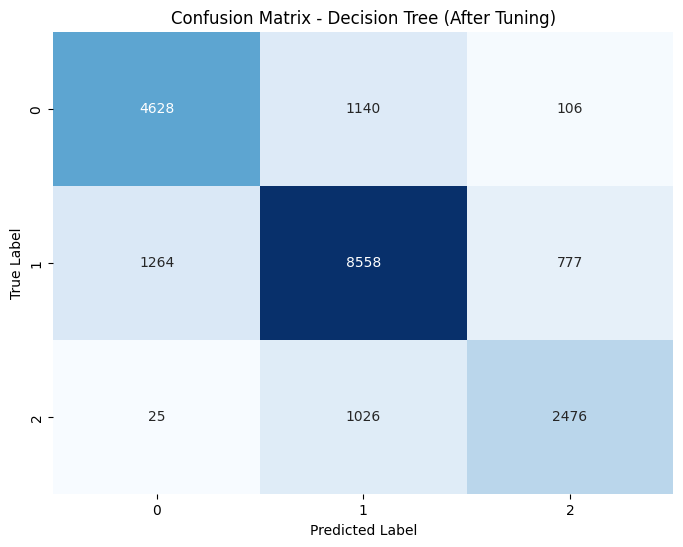

Accuracy: 0.7831
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      5874
           1       0.80      0.81      0.80     10599
           2       0.74      0.70      0.72      3527

    accuracy                           0.78     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.78      0.78      0.78     20000


Random Forest Metrics:


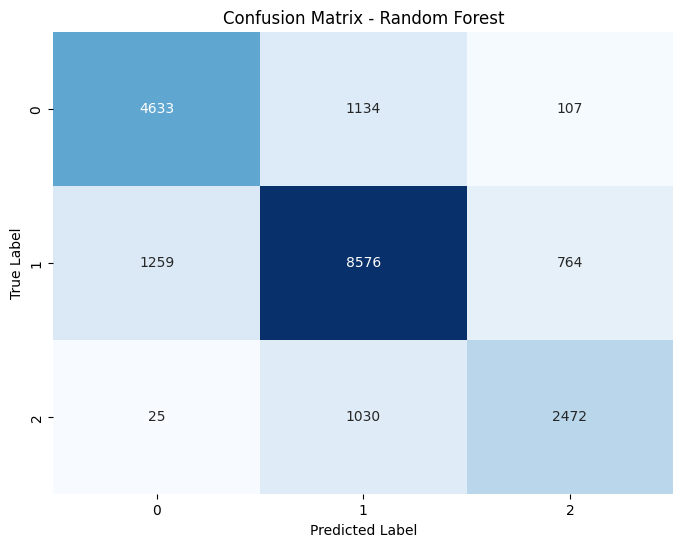

Accuracy: 0.78405
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      5874
           1       0.80      0.81      0.80     10599
           2       0.74      0.70      0.72      3527

    accuracy                           0.78     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.78      0.78      0.78     20000



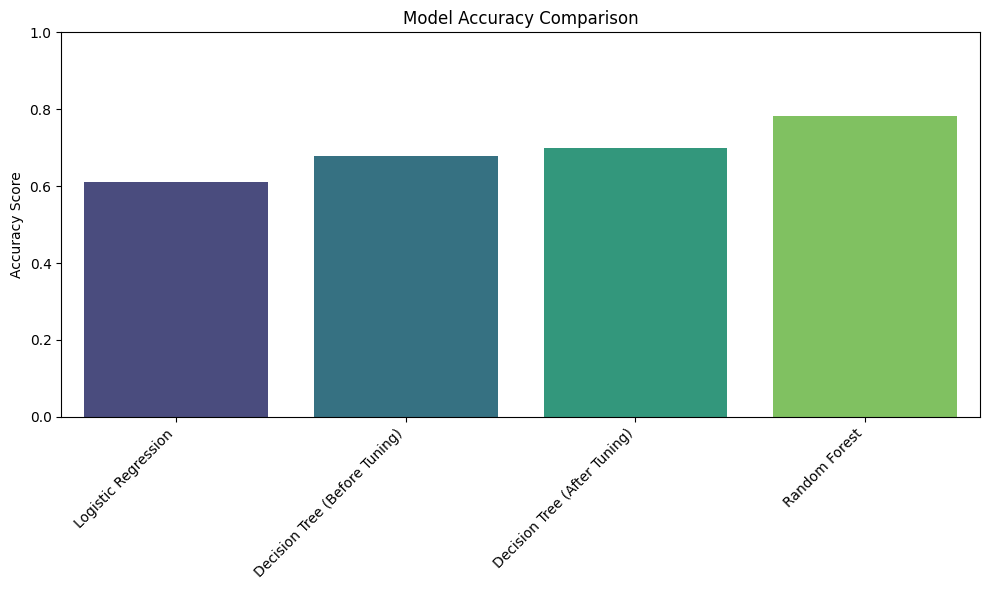

In [24]:


def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

print("Logistic Regression Metrics:")
plot_confusion_matrix(y_test, y_pred, "Logistic Regression")

print("\nDecision Tree Metrics (Before Tuning):")
# Re-fit Decision Tree to get y_pred for the original DT
dt_orig = DecisionTreeClassifier()
dt_orig.fit(x_train, y_train)
y_pred_dt_orig = dt_orig.predict(x_test)
plot_confusion_matrix(y_test, y_pred_dt_orig, "Decision Tree (Before Tuning)")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_orig))
print("Classification Report:\n", classification_report(y_test, y_pred_dt_orig))


print("\nDecision Tree Metrics (After Hyperparameter Tuning):")
plot_confusion_matrix(y_test, y_pred, "Decision Tree (After Tuning)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

print("\nRandom Forest Metrics:")
# Re-fit Random Forest to get y_pred for RF
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Accuracy Comparison Plot
models = ['Logistic Regression', 'Decision Tree (Before Tuning)', 'Decision Tree (After Tuning)', 'Random Forest']
accuracy_scores = [
    accuracy_score(y_test, lr.predict(x_test)),
    accuracy_score(y_test, dt_orig.predict(x_test)),
    accuracy_score(y_test, dt.predict(x_test)),
    accuracy_score(y_test, rf.predict(x_test))
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
